# Cummulative Retuns

Jaime Lopez - Nov. 2024

In this notebook cummulative returns are explored. As examples, returns for Apple (AAPL) and Google (GOOG) are computed for the period 2015-2024. Individual returns are calculated on a base of 5 days.

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
# Loading datasets
aapl_df = pd.read_csv('../datasets/AAPL-2015-2023.csv', index_col='Date', parse_dates=True)
goog_df = pd.read_csv('../datasets/GOOG-2015-2023.csv', index_col='Date', parse_dates=True)

In [217]:
# Intervals of 5
returns = lambda df: df[:-1:5]['Close'].pct_change()
aapl_returns = returns(aapl_df)
goog_returns = returns(goog_df)

Text(0.5, 1.0, 'Cummulative 5-day returns')

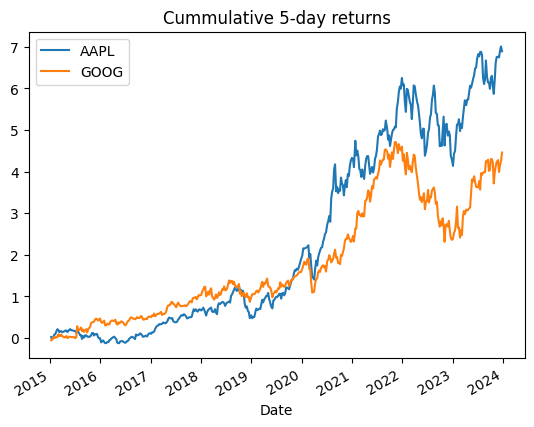

In [224]:
# Showing the general cummulative returns on all the period
((1 + aapl_returns).cumprod() - 1).plot(label='AAPL')
((1 + goog_returns).cumprod() - 1).plot(label='GOOG')
plt.legend()
plt.title('Cummulative 5-day returns')

In [225]:
def cumByYear(serie, symbol=None):
    years = pd.to_datetime(serie.index, utc=True).year.unique()
    result = []
    for year in years:
        subset = serie[pd.to_datetime(serie.index, utc=True).year == year]
        result.append({
            'year': year,
            'std': subset.std(),
            'max_drawdonw': -subset.min(),
            'profitable_periods': subset[subset > 0].count() / len(subset),
            'cum_return': (1 + subset).cumprod().iloc[-1] - 1,
        })
    table = pd.DataFrame(result).set_index('year')
    if symbol:
        table['symbol'] = symbol
    table["inf_ratio"] = table['cum_return'] / table['std']
    return table

In [226]:
aapl_summary = cumByYear(aapl_returns, symbol='AAPL')
aapl_summary

,std,max_drawdonw,profitable_periods,cum_return,symbol,inf_ratio
year,,,,,,
2015,0.034963,0.087961,0.490196,-0.001660,AAPL,-0.047471
2016,0.034315,0.101286,0.580000,0.116930,AAPL,3.407568
2017,0.022097,0.050890,0.640000,0.516496,AAPL,23.374143
2018,0.042356,0.107160,0.549020,-0.085148,AAPL,-2.010305
2019,0.036126,0.065221,0.660000,0.864804,AAPL,23.938498
2020,0.051693,0.125697,0.686275,0.847287,AAPL,16.390596
2021,0.035377,0.061433,0.620000,0.360207,AAPL,10.181911
2022,0.045991,0.109994,0.400000,-0.270907,AAPL,-5.890428
2023,0.029288,0.069049,0.660000,0.492956,AAPL,16.831140


In [227]:
goog_summary = cumByYear(goog_returns, symbol='GOOG')
goog_summary

,std,max_drawdonw,profitable_periods,cum_return,symbol,inf_ratio
year,,,,,,
2015,0.050462,0.073366,0.588235,0.473136,GOOG,9.376130
2016,0.026143,0.079925,0.500000,0.026654,GOOG,1.019547
2017,0.021686,0.044231,0.660000,0.339296,GOOG,15.645691
2018,0.040023,0.103732,0.607843,-0.023120,GOOG,-0.577669
2019,0.029498,0.085790,0.680000,0.305405,GOOG,10.353493
2020,0.042995,0.123410,0.627451,0.295875,GOOG,6.881615
2021,0.033917,0.054671,0.660000,0.672540,GOOG,19.829018
2022,0.046385,0.102299,0.420000,-0.399814,GOOG,-8.619420
2023,0.046020,0.122610,0.620000,0.624247,GOOG,13.564682


In [228]:
summary = pd.concat([aapl_summary, goog_summary])

Text(0.5, 1.0, 'Cummulative 5-day returns')

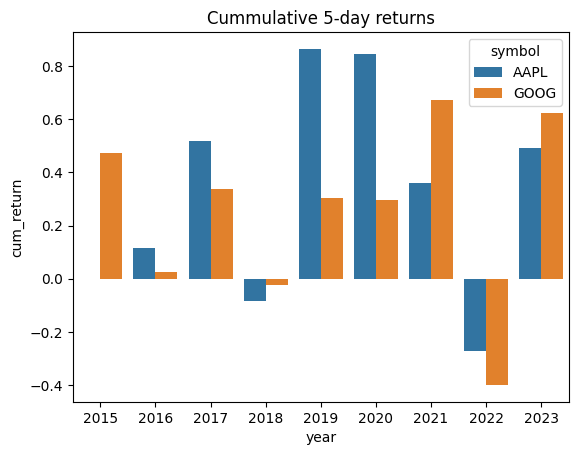

In [229]:
sns.barplot(x='year', y='cum_return', hue='symbol', data=summary)
plt.title("Cummulative 5-day returns")

Text(0.5, 1.0, 'Cummulative 5-day returns information ratio')

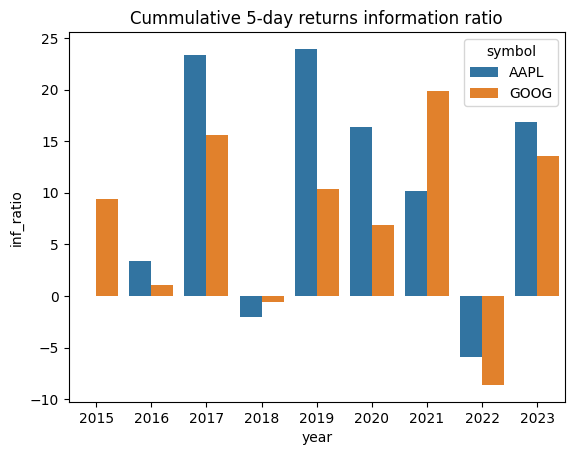

In [230]:
sns.barplot(x='year', y='inf_ratio', hue='symbol', data=summary)
plt.title("Cummulative 5-day returns information ratio")